## Riksdagen P1204  
version 2.2

Egenskap i Wikidata som bör bytas till GUID P8388
* [denna notebook](https://github.com/salgo60/open-data-examples/blob/master/Riksdagen%20P1214.ipynb)
  * video [20201216 om denna notebook](https://youtu.be/BK7Cx0-s7Oo)
  * Phabricator [T235521](https://phabricator.wikimedia.org/T235521)
* [diskussion P1214](https://www.wikidata.org/wiki/Property_talk:P1214#Repair_needed) 
* egenskapsförslag [Wikidata:Property_proposal/Riksdagen_person_guid](https://www.wikidata.org/wiki/Wikidata:Property_proposal/Riksdagen_person_guid)
* [Riksdagensdata 1991 poster](http://data.riksdagen.se/personlista/?iid=&fnamn=&enamn=&f_ar=&kn=&parti=&valkrets=&rdlstatus=samtliga&org=&utformat=json&sort=sorteringsnamn&sortorder=asc&termlista=) 2020 jun
  * 2020-12-16 [2006 poster](http://data.riksdagen.se/personlista/?iid=&fnamn=&enamn=&f_ar=&kn=&parti=&valkrets=&rdlstatus=samtliga&org=&utformat=json&sort=sorteringsnamn&sortorder=asc&termlista=)
  * 2025-01-13 [2512 poster](http://data.riksdagen.se/personlista/?iid=&fnamn=&enamn=&f_ar=&kn=&parti=&valkrets=&rdlstatus=samtliga&org=&utformat=json&sort=sorteringsnamn&sortorder=asc&termlista=)
  * 2025-02-24 [2523 poster](http://data.riksdagen.se/personlista/?iid=&fnamn=&enamn=&f_ar=&kn=&parti=&valkrets=&rdlstatus=samtliga&org=&utformat=json&sort=sorteringsnamn&sortorder=asc&termlista=)
  * 2025-03-04 [2552 poster](http://data.riksdagen.se/personlista/?iid=&fnamn=&enamn=&f_ar=&kn=&parti=&valkrets=&rdlstatus=samtliga&org=&utformat=json&sort=sorteringsnamn&sortorder=asc&termlista=)
 
Odd how how Riksdagens Öppna data adds people.... looks like adding random not every Swedish MP...

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2025-03-06 15:23:10.922308


In [2]:
import urllib3, json
import pandas as pd 
http = urllib3.PoolManager() 
pd.set_option("display.max.columns", None) 
 
url = "http://data.riksdagen.se/personlista/?iid=&fnamn=&enamn=&f_ar=&kn=&parti=&valkrets=&rdlstatus=samtliga&org=&utformat=json&sort=sorteringsnamn&sortorder=asc&termlista="
r = http.request('GET', url)
data = json.loads(r.data)


In [3]:
df = pd.DataFrame(pd.DataFrame(data["personlista"]["person"]))
df.sample(4)

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
917,1776c945-f7ca-4e6f-bc61-cecbaaac217c,b5d42e25-f5ee-4d25-b4aa-342913f4d080,0873650166625,3057284,1986,kvinna,Heikkinen Breitholtz,Sara,"Heikkinen Breitholtz,Sara",,S,Hallands län,Tidigare ersättare,https://data.riksdagen.se/person/b5d42e25-f5ee...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...","{'uppgift': [{'kod': 'HarBild', 'uppgift': ['t..."
1737,cdd8ef0d-c15a-4ce7-9106-89b6c2fc6e6f,e7479c89-0534-4762-baa4-2517b636dde2,0323000187920,5003700,1987,kvinna,Olame Bayibsa,Solange,"Olame Bayibsa,Solange",,S,Stockholms län,Tillgänglig ersättare,https://data.riksdagen.se/person/e7479c89-0534...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...","{'uppgift': [{'kod': 'HarBild', 'uppgift': ['t..."
1452,695384ae-17ff-469f-acac-b523511676f4,ac019194-2cf6-4ebd-8d29-29e1f3950cdf,0358514648113,5004004,1973,kvinna,Lund Kopparklint,Marléne,"Lund Kopparklint,Marléne",,M,Värmlands län,Tjänstgörande riksdagsledamot,https://data.riksdagen.se/person/ac019194-2cf6...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...","{'uppgift': [{'kod': 'HarBild', 'uppgift': ['t..."
1379,5f90f371-1333-442e-a52a-984562e000ae,5f90f371-1333-442e-a52a-984562e000ae,5f90f371-1333-442e-a52a-984562e000ae,5148241,1943,man,Lindahl,Torkel,"Lindahl,Torkel",,FP,Bohuslän,Inga uppdrag,https://data.riksdagen.se/person/5f90f371-1333...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,"{'uppgift': [{'kod': 'HarBild', 'uppgift': ['f..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2554 entries, 0 to 2553
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   hangar_guid     2554 non-null   object
 1   sourceid        2554 non-null   object
 2   intressent_id   2554 non-null   object
 3   hangar_id       2554 non-null   object
 4   fodd_ar         2554 non-null   object
 5   kon             2554 non-null   object
 6   efternamn       2554 non-null   object
 7   tilltalsnamn    2554 non-null   object
 8   sorteringsnamn  2554 non-null   object
 9   iort            2554 non-null   object
 10  parti           2554 non-null   object
 11  valkrets        2554 non-null   object
 12  status          2554 non-null   object
 13  person_url_xml  2554 non-null   object
 14  bild_url_80     2554 non-null   object
 15  bild_url_192    2554 non-null   object
 16  bild_url_max    2554 non-null   object
 17  personuppdrag   2554 non-null   object
 18  personup

Det som skall bytas är  
* intressent_id e.g.  0758652610 
* till sourceid e.g 83345459-cc17-4d4a-b2bb-3748a0f3721c


In [5]:
#for index, row in df.iterrows(): 
#    print (row["tilltalsnamn"], " ", row["efternamn"], "|",  
#           row["intressent_id"],"|", row["sourceid"], "|" ,row["fodd_ar"], "|" ,row["parti"] )

In [6]:
df.describe()

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
count,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554
unique,2554,2554,2533,2554,101,2,1709,867,2513,17,17,63,236,2554,2554,2554,2554,2102,2521
top,fb1d1d30-d1ac-4b9f-9d5c-2f6e83d31f45,5fa54626-81f3-4129-9bbf-cce6af7f8915,,2343549,1943,man,Andersson,Lars,"Andersson,Arne",,S,,Tidigare riksdagsledamot,https://data.riksdagen.se/person/5fa54626-81f3...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,
freq,1,1,22,1,59,1521,63,56,3,2537,867,757,1126,1,1,1,1,453,34


In [7]:
#df.isnull() 

In [8]:
df.describe()

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
count,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554
unique,2554,2554,2533,2554,101,2,1709,867,2513,17,17,63,236,2554,2554,2554,2554,2102,2521
top,fb1d1d30-d1ac-4b9f-9d5c-2f6e83d31f45,5fa54626-81f3-4129-9bbf-cce6af7f8915,,2343549,1943,man,Andersson,Lars,"Andersson,Arne",,S,,Tidigare riksdagsledamot,https://data.riksdagen.se/person/5fa54626-81f3...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,
freq,1,1,22,1,59,1521,63,56,3,2537,867,757,1126,1,1,1,1,453,34


In [9]:
df.parti.unique()

array(['MP', 'L', 'M', 'S', '', 'KD', 'SD', 'FP', '-', 'C', 'PP', 'V',
       'NYD', 'BF - C', 'VPK', 'H - M', 'K - VPK'], dtype=object)

In [10]:
df.parti.value_counts()

parti
S          867
M          476
C          254
FP         192
MP         151
V          145
SD         138
KD         127
L           73
            36
NYD         24
-           23
H - M       19
VPK         17
BF - C       7
K - VPK      3
PP           2
Name: count, dtype: int64

In [11]:
df[df["parti"] == '-'][1:10]

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
95,2bf1ec39-4624-482b-8605-78ba0d1584d6,da0f2189-a8ae-4812-bf5b-bab23afa738b,0817420987900,2341996,1938,man,Andersson,John,"Andersson,John",,-,,Tidigare riksdagsledamot,https://data.riksdagen.se/person/da0f2189-a8ae...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...","{'uppgift': [{'kod': 'HarBild', 'uppgift': ['t..."
121,b5b961cf-bd1d-4238-b2a2-87039574a890,d7c317d9-83e4-11d4-ae60-0050040c9b55,0892012091809,2342198,1943,man,Andersson,Sten,"Andersson,Sten",,-,,Tidigare riksdagsledamot,https://data.riksdagen.se/person/d7c317d9-83e4...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...","{'uppgift': [{'kod': 'HarBild', 'uppgift': ['t..."
347,cdc4320c-6742-4146-9d9a-c2b1c3ae0aec,c93800eb-8db0-44fb-acc4-868d24527a63,049679140507,2341885,1935,man,Brohult,Johan,"Brohult,Johan",,-,,Tidigare riksdagsledamot,https://data.riksdagen.se/person/c93800eb-8db0...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...","{'uppgift': [{'kod': 'HarBild', 'uppgift': ['t..."
387,5b025fbe-995b-489e-b4f5-436b9a94f960,8340e89d-250a-4300-bab5-6937399ee277,0737073162411,2343464,1970,kvinna,Carlsson Löfdahl,Emma,"Carlsson Löfdahl,Emma",,-,Jönköpings län,Tidigare riksdagsledamot,https://data.riksdagen.se/person/8340e89d-250a...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'L', 'roll_kod': 'K...","{'uppgift': [{'kod': 'HarBild', 'uppgift': ['t..."
531,8c9a4aa9-99e8-423c-bcc6-0e051f3d65e3,6a1b02dd-bdc4-4019-ab3e-dfeb133018ed,0121939297619,2343113,1960,man,El-Haj,Jamal,"El-Haj,Jamal",,-,Malmö kommun,Tjänstgörande riksdagsledamot,https://data.riksdagen.se/person/6a1b02dd-bdc4...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...","{'uppgift': [{'kod': 'HarBild', 'uppgift': ['t..."
644,faf50af6-b9c6-427f-92bd-58fbe0b68374,eb4a2005-9ec1-45c0-9f63-3e4ffdc4f04e,046426524512,3057163,1953,man,Felten,Olle,"Felten,Olle",,-,Södermanlands län,Tidigare riksdagsledamot,https://data.riksdagen.se/person/eb4a2005-9ec1...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...","{'uppgift': [{'kod': 'HarBild', 'uppgift': ['t..."
728,74b879f9-19e4-400c-88f4-8402f3d17653,a8568101-4108-42b7-8dd6-f14665dfa9ac,0504711999229,2858135,1989,man,Gamov,Pavel,"Gamov,Pavel",,-,Skåne läns södra,Tidigare riksdagsledamot,https://data.riksdagen.se/person/a8568101-4108...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...","{'uppgift': [{'kod': 'HarBild', 'uppgift': ['f..."
787,dc0dc4dc-1049-4894-8e18-aa1d01946a5b,1f0d91c1-605d-4b20-9825-fb8ee5373dcb,0697941234716,2369368,1964,kvinna,Gunsdotter,Margareta,"Gunsdotter,Margareta",,-,Västra Götalands läns östra,Tidigare riksdagsledamot,https://data.riksdagen.se/person/1f0d91c1-605d...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'upp

In [12]:
df[df["parti"] == 'JL'] # Junilistan 

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift


In [13]:
df[df["parti"] == 'PP'] #  Piratpartiet

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
60,d1227eb7-dff4-4a95-9134-4e8bff6f622d,60f468dd-1052-49c8-bf6d-05b0e1a4dac5,0528830353520,2821456,1987,kvinna,Andersdotter,Amelia,"Andersdotter,Amelia",,PP,,Tidigare europaparlamentariker,https://data.riksdagen.se/person/60f468dd-1052...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...","{'uppgift': [{'kod': 'HarBild', 'uppgift': ['t..."
562,9df4dbf5-7579-4912-8550-ef963616f134,4af0724f-02ce-4a91-8af0-fa2154606b6f,0735009164618,2821454,1960,man,Engström,Christian,"Engström,Christian",,PP,,Tidigare europaparlamentariker,https://data.riksdagen.se/person/4af0724f-02ce...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...","{'uppgift': [{'kod': 'HarBild', 'uppgift': ['t..."


In [14]:
df[df["parti"] == 'FI'] #  FI

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift


In [15]:
df.valkrets.value_counts()

valkrets
                                                       757
Stockholms län                                         210
Stockholms kommun                                      190
Göteborgs kommun                                       101
Östergötlands län                                       78
                                                      ... 
Fyrstadskretsen 1979/80-1981/82                          1
Fyrstadskretsen 1971-1973 och\r\n1976/77-1987/79         1
Fyrstadskretsen 1971-1978/79\r\nLedamot av Andra ka      1
Fyrstadskretsen 1971-1981/82\r\n(Ledamot av Andra k      1
Fyrstadskretsen 1984/85\r\n(från 11.4.1985)              1
Name: count, Length: 63, dtype: int64

In [16]:
df.status.value_counts()

status
Tidigare riksdagsledamot         1126
Inga uppdrag                      402
Tjänstgörande riksdagsledamot     323
Tidigare ersättare                202
Tillgänglig ersättare             112
                                 ... 
Avliden  2021-01-02                 1
Avliden  2012-12-24                 1
Avliden  2002-03-28                 1
Avliden  2017-02-14                 1
Avliden  2019-06-13                 1
Name: count, Length: 236, dtype: int64

In [17]:
#for r,y in df.status.value_counts().iteritems():
#    if r.split(" ")[0] not in "Avliden" :
#        print (r,y)

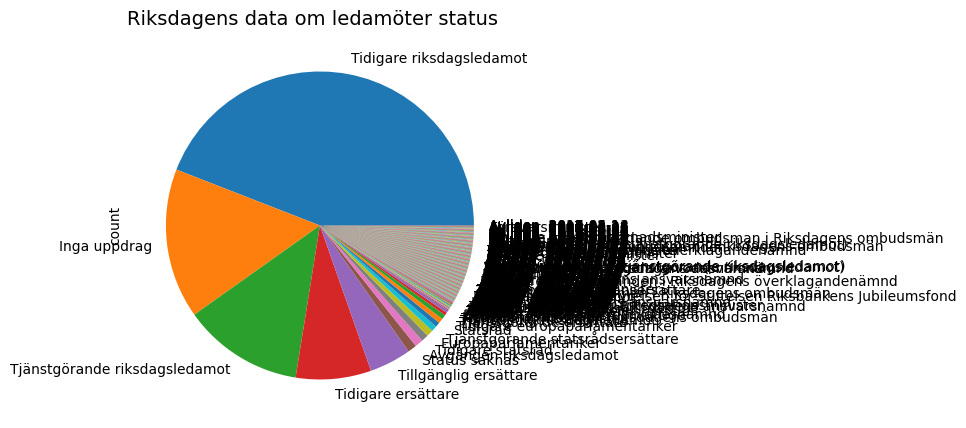

In [18]:
%matplotlib inline  
import matplotlib.pyplot as plt   
plot = df["status"].value_counts().plot.pie(y='counts', figsize=(5, 5))  
plt.title("Riksdagens data om ledamöter status",fontsize=14,
    loc='left')
plt.show()

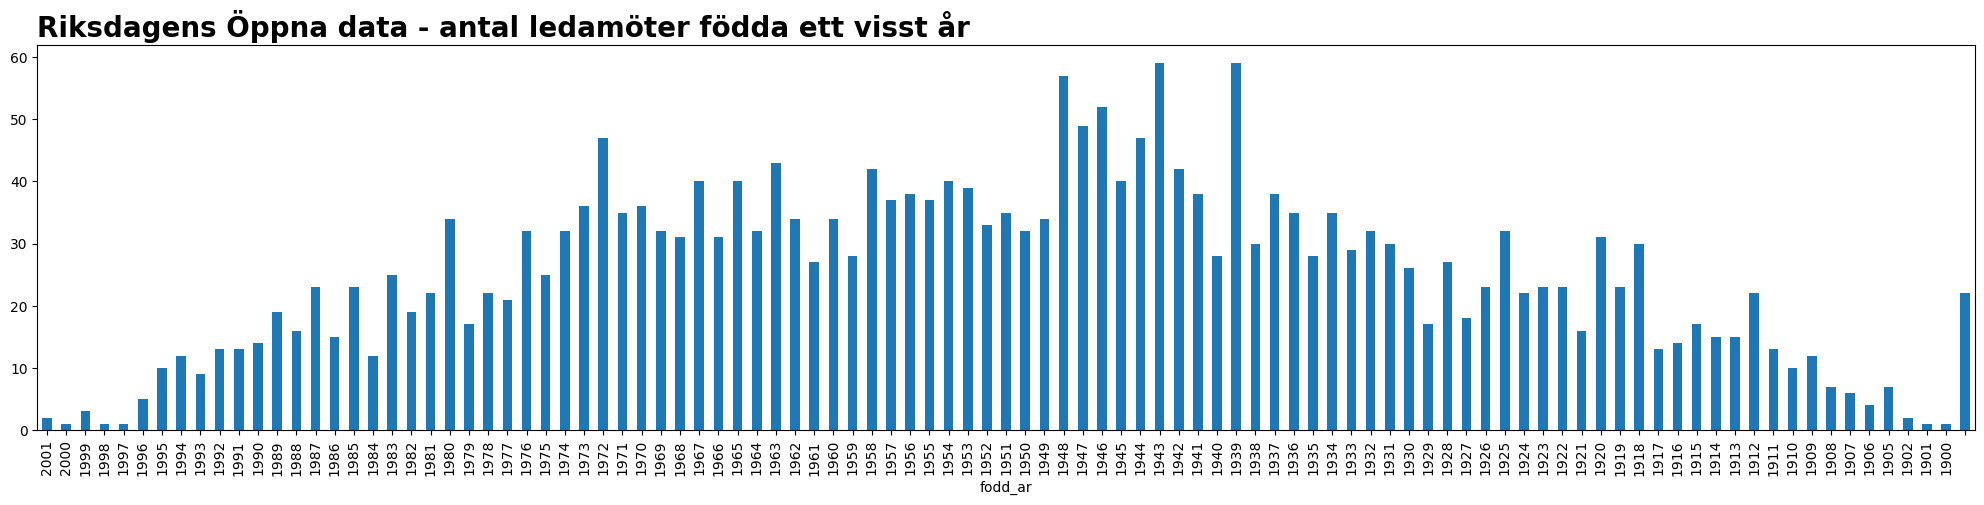

In [19]:
plot = df.fodd_ar.value_counts().sort_index(ascending=False).plot.bar(y='counts', figsize=(25, 5))  
plt.title("Riksdagens Öppna data - antal ledamöter födda ett visst år",fontsize=20,
    loc='left',
    fontweight='bold',)
plt.show()

In [20]:
df.iort.value_counts()

iort
               2537
Stockholm         2
Luleå             1
Helsingborg       1
Stockaryd         1
Röstånga          1
Stjärnhov         1
Simrishamn        1
Visby             1
Norrhult          1
Gamleby           1
Bengtsfors        1
Hallsberg         1
Degerhamn         1
Gislaved          1
Skellefteå        1
Göteborg          1
Name: count, dtype: int64

### Compare WD - P8388 = Riksdagen person GUID

In [21]:
# pip install sparqlwrapper
# https://rdflib.github.io/sparqlwrapper/

import sys,json
import pandas as pd 

from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

queryP8388 = """SELECT (REPLACE(STR(?item), ".*Q", "Q") AS ?WikidataID)  ?riksdagenGUID  WHERE {
?item wdt:P8388 ?riksdagenGUID
}"""

def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDP8388 = get_sparql_dataframe(endpoint_url, queryP8388)
WDP8388["Source"] = "PropertyP8388" 

In [22]:
WDP8388.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593 entries, 0 to 2592
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WikidataID     2593 non-null   object
 1   riksdagenGUID  2593 non-null   object
 2   Source         2593 non-null   object
dtypes: object(3)
memory usage: 60.9+ KB


In [23]:
WDP8388.sample(10)

,WikidataID,riksdagenGUID,Source
1664,Q104215963,f965c024-1cd1-4a10-bff1-7615c8b1bde4,PropertyP8388
1586,Q444680,d7c32377-83e4-11d4-ae60-0050040c9b55,PropertyP8388
1155,Q6201875,d7c32612-83e4-11d4-ae60-0050040c9b55,PropertyP8388
830,Q5541652,d7c328d3-83e4-11d4-ae60-0050040c9b55,PropertyP8388
578,Q97971265,a2579dc8-bf68-4ba8-a649-39b1af4c228d,PropertyP8388
669,Q2587680,1a33195b-b164-464e-9542-2ad53e6091ca,PropertyP8388
102,Q4976504,96b213d6-b9eb-4246-bb08-b1383f4ed7bf,PropertyP8388
406,Q70407251,cd568a26-75c0-401e-a4de-d43589a8dc21,PropertyP8388
1317,Q56925588,235255cd-cf3b-4b45-906d-5ffe21195683,PropertyP8388
1891,Q5976015,708f9400-480a-4f4b-9a28-ed976891757d,PropertyP8388


### Compare Riksdagen <-> WD 

In [24]:
#WDP1214 <-> df
mergeRiksdagenWD = pd.merge(WDP8388, df,how='outer', left_on='riksdagenGUID', right_on='sourceid',indicator=True)   
mergeRiksdagenWD.rename(columns={"_merge": "WD_Riksdagen"},inplace = True)
mergeRiksdagenWD['WD_Riksdagen'] = mergeRiksdagenWD['WD_Riksdagen'].str.replace('left_only','WD_only').str.replace('right_only','Riksdagen_only')
mergeRiksdagenWD["WD_Riksdagen"].value_counts()  
mergeRiksdagenWD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595 entries, 0 to 2594
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   WikidataID      2593 non-null   object
 1   riksdagenGUID   2593 non-null   object
 2   Source          2593 non-null   object
 3   hangar_guid     2556 non-null   object
 4   sourceid        2556 non-null   object
 5   intressent_id   2556 non-null   object
 6   hangar_id       2556 non-null   object
 7   fodd_ar         2556 non-null   object
 8   kon             2556 non-null   object
 9   efternamn       2556 non-null   object
 10  tilltalsnamn    2556 non-null   object
 11  sorteringsnamn  2556 non-null   object
 12  iort            2556 non-null   object
 13  parti           2556 non-null   object
 14  valkrets        2556 non-null   object
 15  status          2556 non-null   object
 16  person_url_xml  2556 non-null   object
 17  bild_url_80     2556 non-null   object
 18  bild_url

In [25]:
mergeRiksdagenWD["WD_Riksdagen"].value_counts() 

WD_Riksdagen
both              2554
WD_only             39
Riksdagen_only       2
Name: count, dtype: int64

In [26]:
mergeCheck = mergeRiksdagenWD[['WikidataID', 'riksdagenGUID','Source','sourceid','status','WD_Riksdagen','tilltalsnamn','efternamn','parti','fodd_ar','intressent_id']] 

In [27]:
Riksdagen_only = mergeCheck[mergeCheck["WD_Riksdagen"] == "Riksdagen_only"].copy() 

In [28]:
pd.set_option('display.max_rows', None) 



## Riksdagen_only
TODO: check if new people at Riksdagen

In [29]:
Riksdagen_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 2593 to 2594
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WikidataID     0 non-null      object
 1   riksdagenGUID  0 non-null      object
 2   Source         0 non-null      object
 3   sourceid       2 non-null      object
 4   status         2 non-null      object
 5   WD_Riksdagen   2 non-null      object
 6   tilltalsnamn   2 non-null      object
 7   efternamn      2 non-null      object
 8   parti          2 non-null      object
 9   fodd_ar        2 non-null      object
 10  intressent_id  2 non-null      object
dtypes: object(11)
memory usage: 192.0+ bytes


In [30]:
from IPython.display import display, HTML   
Riksdagen_only["Riksdagen"] = "<a href='https://www.riksdagen.se/sv/ledamoter-partier/ledamot/_" + Riksdagen_only['sourceid'].astype(str) + "'>link</a>"
Riksdagen_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 2593 to 2594
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WikidataID     0 non-null      object
 1   riksdagenGUID  0 non-null      object
 2   Source         0 non-null      object
 3   sourceid       2 non-null      object
 4   status         2 non-null      object
 5   WD_Riksdagen   2 non-null      object
 6   tilltalsnamn   2 non-null      object
 7   efternamn      2 non-null      object
 8   parti          2 non-null      object
 9   fodd_ar        2 non-null      object
 10  intressent_id  2 non-null      object
 11  Riksdagen      2 non-null      object
dtypes: object(12)
memory usage: 208.0+ bytes


In [31]:
#Riksdagen_only = Riksdagen_only.sort_values(by=['fodd_ar'], ascending=[False])
#HTML(Riksdagen_only[{'tilltalsnamn','efternamn','parti','WikidataID','Riksdagen','fodd_ar','intressent_id'}].to_html(escape=False))
Riksdagen_only = Riksdagen_only.sort_values(by=['fodd_ar'], ascending=[False]) 
HTML(Riksdagen_only[['tilltalsnamn', 'efternamn', 'parti', 'WikidataID', 'Riksdagen', 'fodd_ar', 'intressent_id','sourceid','status']].to_html(escape=False))


,tilltalsnamn,efternamn,parti,WikidataID,Riksdagen,fodd_ar,intressent_id,sourceid,status
2593,Bedrija,Halilovic,S,NaN,link,1966,0214742107314,3e857be6-df99-4215-8b87-8db2625a06ac,Tillgänglig ersättare
2594,Stefan,Lissmark,S,NaN,link,1953,0166966305410,c40180e2-938b-4396-ab26-2ec6c69dc7ec,Tillgänglig ersättare


In [32]:
Riksdagen_only["fodd_ar"].value_counts() 

fodd_ar
1966    1
1953    1
Name: count, dtype: int64

In [33]:
Riksdagen_only["parti"].value_counts() 

parti
S    2
Name: count, dtype: int64

In [34]:
Riksdagen_only.to_csv("Riksdagen_only.csv")

### Check WD if we have P1214 set but not P8388 GUID

In [35]:
import sys,json
import pandas as pd 

from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

queryP1214 = """SELECT (REPLACE(STR(?item), ".*Q", "Q") AS ?WikidataID)  ?WDriksdagenID  WHERE {
?item wdt:P1214 ?WDriksdagenID.
minus {?item wdt:P8388 ?riksdagenGUID}
}"""


WDP1214 = get_sparql_dataframe(endpoint_url, queryP1214)
WDP1214["Source"] = "PropertyP1214" 

In [36]:
WDP1214.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WikidataID     0 non-null      object
 1   WDriksdagenID  0 non-null      object
 2   Source         0 non-null      object
dtypes: object(3)
memory usage: 132.0+ bytes


In [37]:
#Merge WDP1214 with Riksdagen_only
#mergeCheckWDP214[mergeCheck["WD_Riksdagen"] == "Riksdagen_only"].copy()  
mergeRiksdagenWDP214 = pd.merge(WDP1214, df,how='outer', left_on='WDriksdagenID', right_on='intressent_id',indicator=True)   
mergeRiksdagenWDP214.rename(columns={"_merge": "WDP1214_Riksdagen"},inplace = True)
mergeRiksdagenWDP214['WDP1214_Riksdagen'] = mergeRiksdagenWDP214['WDP1214_Riksdagen'].str.replace('left_only','WDP1214_only').str.replace('right_only','Riksdagenintressent_id_only')
mergeRiksdagenWDP214["WDP1214_Riksdagen"].value_counts()  
mergeRiksdagenWDP214.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2554 entries, 0 to 2553
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   WikidataID         0 non-null      object
 1   WDriksdagenID      0 non-null      object
 2   Source             0 non-null      object
 3   hangar_guid        2554 non-null   object
 4   sourceid           2554 non-null   object
 5   intressent_id      2554 non-null   object
 6   hangar_id          2554 non-null   object
 7   fodd_ar            2554 non-null   object
 8   kon                2554 non-null   object
 9   efternamn          2554 non-null   object
 10  tilltalsnamn       2554 non-null   object
 11  sorteringsnamn     2554 non-null   object
 12  iort               2554 non-null   object
 13  parti              2554 non-null   object
 14  valkrets           2554 non-null   object
 15  status             2554 non-null   object
 16  person_url_xml     2554 non-null   object


In [38]:
mergeRiksdagenWDP214["WDP1214_Riksdagen"].value_counts() 

WDP1214_Riksdagen
Riksdagenintressent_id_only    2554
Name: count, dtype: int64

In [39]:
Riksdagen_intressent_id_only = mergeRiksdagenWDP214[mergeRiksdagenWDP214["WDP1214_Riksdagen"] == "both"].copy() 
HTML(Riksdagen_intressent_id_only[['sourceid','tilltalsnamn','efternamn','parti','WikidataID','fodd_ar','intressent_id','WDriksdagenID','WDP1214_Riksdagen']].to_html(escape=False))


,sourceid,tilltalsnamn,efternamn,parti,WikidataID,fodd_ar,intressent_id,WDriksdagenID,WDP1214_Riksdagen


In [40]:
#create file to update Wikidata with GUID 
#This file should be empty
HTML(Riksdagen_intressent_id_only[['WikidataID','sourceid']].to_html(escape=False))


,WikidataID,sourceid


In [41]:
#Maybe should be empty. We need to ask Riksdagen if they delete people,,, if not we have errors in WD or in this Notebook
Riksdagen_intressent_wd_only = mergeRiksdagenWDP214[mergeRiksdagenWDP214["WDP1214_Riksdagen"] == "WDP1214_only"].copy() 
Riksdagen_intressent_wd_only

,WikidataID,WDriksdagenID,Source,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift,WDP1214_Riksdagen


## Check WD if we have P8388 GUID set but not old P1214 
* as old documents use P1214 its make sense to have both
* new created records seems to lack P1214 at Riksdagen

In [42]:
import sys,json
import pandas as pd 

from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

queryP8388miss = """SELECT (REPLACE(STR(?item), ".*Q", "Q") AS ?WikidataID)  ?WDriksdagenGUID  WHERE {
?item wdt:P8388 ?WDriksdagenGUID.
minus {?item wdt:P1214 ?riksdagenID}
}"""


WDP8388_miss = get_sparql_dataframe(endpoint_url, queryP8388miss)
WDP8388_miss["Source"] = "Property8388" 

In [43]:
WDP8388_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   WikidataID       531 non-null    object
 1   WDriksdagenGUID  531 non-null    object
 2   Source           531 non-null    object
dtypes: object(3)
memory usage: 12.6+ KB


In [44]:
# merge WDP8388_miss WDriksdagenGUID with  
mergeRiksdagenWDP8388_miss = pd.merge(WDP8388_miss, df,how='outer', left_on='WDriksdagenGUID', right_on='sourceid',indicator=True)   
mergeRiksdagenWDP8388_miss.rename(columns={"_merge": "WDP8388_miss_Riksdagen"},inplace = True)
mergeRiksdagenWDP8388_miss['WDP8388_miss_Riksdagen'] = mergeRiksdagenWDP8388_miss['WDP8388_miss_Riksdagen'].str.replace('left_only','WDP8388_miss_Riksdagen_only').str.replace('right_only','Riksdagensourceid_only')
mergeRiksdagenWDP8388_miss["WDP8388_miss_Riksdagen"].value_counts()  

WDP8388_miss_Riksdagen
Riksdagensourceid_only         2062
both                            492
WDP8388_miss_Riksdagen_only      39
Name: count, dtype: int64

In [45]:
mergeRiksdagenWDP8388_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593 entries, 0 to 2592
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   WikidataID              531 non-null    object
 1   WDriksdagenGUID         531 non-null    object
 2   Source                  531 non-null    object
 3   hangar_guid             2554 non-null   object
 4   sourceid                2554 non-null   object
 5   intressent_id           2554 non-null   object
 6   hangar_id               2554 non-null   object
 7   fodd_ar                 2554 non-null   object
 8   kon                     2554 non-null   object
 9   efternamn               2554 non-null   object
 10  tilltalsnamn            2554 non-null   object
 11  sorteringsnamn          2554 non-null   object
 12  iort                    2554 non-null   object
 13  parti                   2554 non-null   object
 14  valkrets                2554 non-null   object
 15  stat

In [46]:
WD_P8388_only = mergeRiksdagenWDP8388_miss[mergeRiksdagenWDP8388_miss["WDP8388_miss_Riksdagen"] == "both"].copy() 
# TO DO filter only records with intressent_id ==> those wD records should get P1214
HTML(WD_P8388_only[['WikidataID','intressent_id','sourceid']].to_html(escape=False))
WD_P8388_only

,WikidataID,WDriksdagenGUID,Source,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift,WDP8388_miss_Riksdagen
0,Q5901468,f242e684-80ce-49b9-a3a8-5ee3f5d97fca,Property8388,f242e684-80ce-49b9-a3a8-5ee3f5d97fca,f242e684-80ce-49b9-a3a8-5ee3f5d97fca,f242e684-80ce-49b9-a3a8-5ee3f5d97fca,5148603,1915,man,Karlsson,Helge,"Karlsson,Helge",,S,Blekinge län,Inga uppdrag,https://data.riksdagen.se/person/f242e684-80ce...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,"{'uppgift': [{'kod': 'HarBild', 'uppgift': ['f...",both
1,Q5923238,57461498-1034-4551-87ea-3e5d3b788046,Property8388,57461498-1034-4551-87ea-3e5d3b788046,57461498-1034-4551-87ea-3e5d3b788046,57461498-1034-4551-87ea-3e5d3b788046,5148199,1919,man,Kristenson,Valter,"Kristenson,Valter",,S,Göteborgs kommun,Inga uppdrag,https://data.riksdagen.se/person/57461498-1034...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,"{'uppgift': [{'kod': 'HarBild', 'uppgift': ['f...",both
2,Q5923374,b13bbf19-e175-4f32-bcca-24a445bf6961,Property8388,b13bbf19-e175-4f32-bcca-24a445bf6961,b13bbf19-e175-4f32-bcca-24a445bf6961,b13bbf19-e175-4f32-bcca-24a445bf6961,5148627,1907,man,Kristiansson,Svante,"Kristiansson,Svante",,S,Kristianstads län,Inga uppdrag,https://data.riksdagen.se/person/b13bbf19-e175...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,"{'uppgift': [{'kod': 'HarBild', 'uppgift': ['f...",both
3,Q5923516,fdc25f55-78ca-41d4-84b8-96b46df851d2,Property8388,f5b575fa-1cf3-40b6-ad32-782ee25bf8dc,fdc25f55-78ca-41d4-84b8-96b46df851d2,,5149636,,man,Kristow,Erik,"Kristow,Erik",,,,Status saknas,https://data.riksdagen.se/person/fdc25f55-78ca...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'RB', 'roll_kod': '...",,both
4,Q5925133,8d5a7da0-dd9d-4589-9593-58825c07887d,Property8388,8d5a7da0-dd9d-4589-9593-58825c07887d,8d5a7da0-dd9d-4589-9593-58825c07887d,8d5a7da0-dd9d-4589-9593-58825c07887d,5148575,1931,man,Krönmark,Eric,"Krönmark,Eric",,H - M,Kalmar län,Inga uppdrag,https://data.riksdagen.se/person/8d5a7da0-dd9d...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,"{'uppgift': [{'kod': 'HarBild', 'uppgift': ['f...",both
5,Q5928428,14d44ef5-fb2a-4a49-b68b-b6a13db80a48,Property8388,14d44ef5-fb2a-4a49-b68b-b6a13db80a48,14d44ef5-fb2a-4a49-b68b-b6a13db80a48,14d44ef5-fb2a-4a49-b68b-b6a13db80a48,5148201,1918,man,Källstad,Thorvald,"Källstad,Thorvald",,FP,Göteborgs kommun,Inga uppdrag,https://data.riksdagen.se/person/14d44ef5-fb2a...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,"{'uppgift': [{'kod': 'HarBild', 'uppgift': ['f...",both
6,Q5935863,742e69d3-2609-43a0-b626-6933ea907a61,Property8388,742e69d3-2609-43a0-b626-6933ea907a61,742e69d3-2609-43a0-b626-6933ea907a61,742e69d3-2609-43a0-b626-6933ea907a61,5148473,1913,man,Larfors,Tage,"Larfors,Tage",,S,Södermanlands län,Inga uppdrag,https://data.riksdagen.se/person/742e69d3-2609...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,"{'uppgift': [{'kod': 'HarBild', 'uppgift': ['f...",both
7,Q5937280,a72fa07a-8a59-41e8-9588-a52172f090da,Property8388,a72fa07a-8a59-41e8-9588-a52172f090da,a72fa07a-8a59-41e8-9588-a52172f090da,a72fa07a-8a59-41e8-9588-a52172f090da,5148629,1925,man,Larsson,Einar

In [47]:
WD_P8388_only[WD_P8388_only["kon"] =="kvinna"]

,WikidataID,WDriksdagenGUID,Source,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift,WDP8388_miss_Riksdagen
102,Q131732984,ab14b8e9-d566-4035-b192-1911d46dc6d9,Property8388,66b9e518-7019-4612-b759-852be5f41d0b,ab14b8e9-d566-4035-b192-1911d46dc6d9,0762821598617,2343269,1964,kvinna,Drenjanin,Jelena,"Drenjanin,Jelena",,M,Stockholms län,Tillgänglig ersättare,https://data.riksdagen.se/person/ab14b8e9-d566...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,"{'uppgift': [{'kod': 'HarBild', 'uppgift': ['t...",both
103,Q131732985,b037bbc4-5fd1-4afc-8388-b463600497b1,Property8388,0d854506-3f83-465d-9887-f592f5397c20,b037bbc4-5fd1-4afc-8388-b463600497b1,0524250193013,5146618,1963,kvinna,Canhasi,Britt-Mari,"Canhasi,Britt-Mari",,SD,Stockholms län,Tillgänglig ersättare,https://data.riksdagen.se/person/b037bbc4-5fd1...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,"{'uppgift': [{'kod': 'HarBild', 'uppgift': ['f...",both
110,Q132158259,1ccc2006-f025-471e-aa4b-1aecdfd2f43f,Property8388,525158f1-cd58-4bbd-b179-c4b9cd4da60d,1ccc2006-f025-471e-aa4b-1aecdfd2f43f,0876751376826,5171447,1989,kvinna,Grönholm,Julia Maria Christina,"Grönholm,Julia Maria Christina",,MP,Malmö kommun,Tillgänglig ersättare,https://data.riksdagen.se/person/1ccc2006-f025...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,,both
113,Q132158281,e868ec69-f5d0-44b4-9b0b-ad2f6940a37d,Property8388,4b2d68ed-7887-4dd3-87f2-191e2ef25fdf,e868ec69-f5d0-44b4-9b0b-ad2f6940a37d,0908675564620,5146737,1975,kvinna,Enström,Isabel,"Enström,Isabel",,MP,Malmö kommun,Status saknas,https://data.riksdagen.se/person/e868ec69-f5d0...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,,both
115,Q132718082,2b28bd07-30fe-4e5a-b49f-4a810502f0b5,Property8388,13b369e5-d600-4bd4-b3ce-da058363c275,2b28bd07-30fe-4e5a-b49f-4a810502f0b5,0538234374519,5237868,1972,kvinna,Brohede Tellström,Monica,"Brohede Tellström,Monica",,L,Stockholms kommun,Tillgänglig ersättare,https://data.riksdagen.se/person/2b28bd07-30fe...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,,both
117,Q132863295,0f962e14-b706-4585-bc66-f6782bd95d0f,Property8388,c86fef72-0b89-4114-ba10-d01eef1a5173,0f962e14-b706-4585-bc66-f6782bd95d0f,028755297020,5146860,1975,kvinna,Nilsson,Ulrika,"Nilsson,Ulrika",,S,Värmlands län,Tillgänglig ersättare,https://data.riksdagen.se/person/0f962e14-b706...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,,both
118,Q132863293,1aa8195e-3065-442b-8653-e9b3907191bd,Property8388,72414d2d-198b-4992-aaa2-9bea6713f260,1aa8195e-3065-442b-8653-e9b3907191bd,0672952571028,5146862,1992,kvinna,Boquist,Jenny,"Boquist,Jenny",,S,Värmlands län,Tillgänglig ersättare,https://data.riksdagen.se/person/1aa8195e-3065...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,,both
119,Q132863298,1a372da3-ebd3-4a3a-adf0-0a08ee869489,Property8388,5fcbd902-82a7-4906-ba85-40ecb129455a,1a372da3-ebd3-4a3a-adf0-0a08ee869489,,5238615,,kvinna,Tarschys,Charlotte,"Tarschys,Charlotte",,,,Suppleant i Riksbanksfullmäktige,https://data.riksdagen.se/person/1a372da3-ebd3...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bil

In [48]:
WD_P8388_only["intressent_id"].str

In [49]:
mergeRiksdagenWDP8388_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593 entries, 0 to 2592
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   WikidataID              531 non-null    object
 1   WDriksdagenGUID         531 non-null    object
 2   Source                  531 non-null    object
 3   hangar_guid             2554 non-null   object
 4   sourceid                2554 non-null   object
 5   intressent_id           2554 non-null   object
 6   hangar_id               2554 non-null   object
 7   fodd_ar                 2554 non-null   object
 8   kon                     2554 non-null   object
 9   efternamn               2554 non-null   object
 10  tilltalsnamn            2554 non-null   object
 11  sorteringsnamn          2554 non-null   object
 12  iort                    2554 non-null   object
 13  parti                   2554 non-null   object
 14  valkrets                2554 non-null   object
 15  stat

### Wikidata med Sweriks P12192 födda jmf med Riksdagen

In [50]:
queryP12192 = """SELECT (REPLACE(STR(?item), ".*Q", "Q") AS ?WikidataID)  ?Sweriks ?birth  WHERE {
?item wdt:P12192 ?Sweriks.
OPTIONAL {?item wdt:P569 ?birth}
}"""

def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDP12192 = get_sparql_dataframe(endpoint_url, queryP12192)
WDP12192["Source"] = "PropertyP12192" 

In [51]:
WDP12192.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   WikidataID  6175 non-null   object
 1   Sweriks     6175 non-null   object
 2   birth       6166 non-null   object
 3   Source      6175 non-null   object
dtypes: object(4)
memory usage: 193.1+ KB


In [52]:
WDP12192['birth'] = pd.to_datetime(WDP12192['birth'])
WDP12192['birth_year'] = WDP12192['birth'].dt.year
WDP12192.sample(4)

,WikidataID,Sweriks,birth,Source,birth_year
4045,Q5881050,i-6NzedWSQDLuRphqD7isMyy,1865-08-21 00:00:00+00:00,PropertyP12192,1865.0
364,Q114659286,i-4rA8nu7Qns2drm1ePJStLd,1978-10-30 00:00:00+00:00,PropertyP12192,1978.0
678,Q57168632,i-4Cf95LugnAL9WAJuCVMeo8,1968-10-08 00:00:00+00:00,PropertyP12192,1968.0
3549,Q5937709,i-PBPTFYFgnRL4viQht1FnjJ,1851-05-17 00:00:00+00:00,PropertyP12192,1851.0


In [53]:
WDP12192.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   WikidataID  6175 non-null   object             
 1   Sweriks     6175 non-null   object             
 2   birth       6166 non-null   datetime64[ns, UTC]
 3   Source      6175 non-null   object             
 4   birth_year  6166 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(3)
memory usage: 241.3+ KB


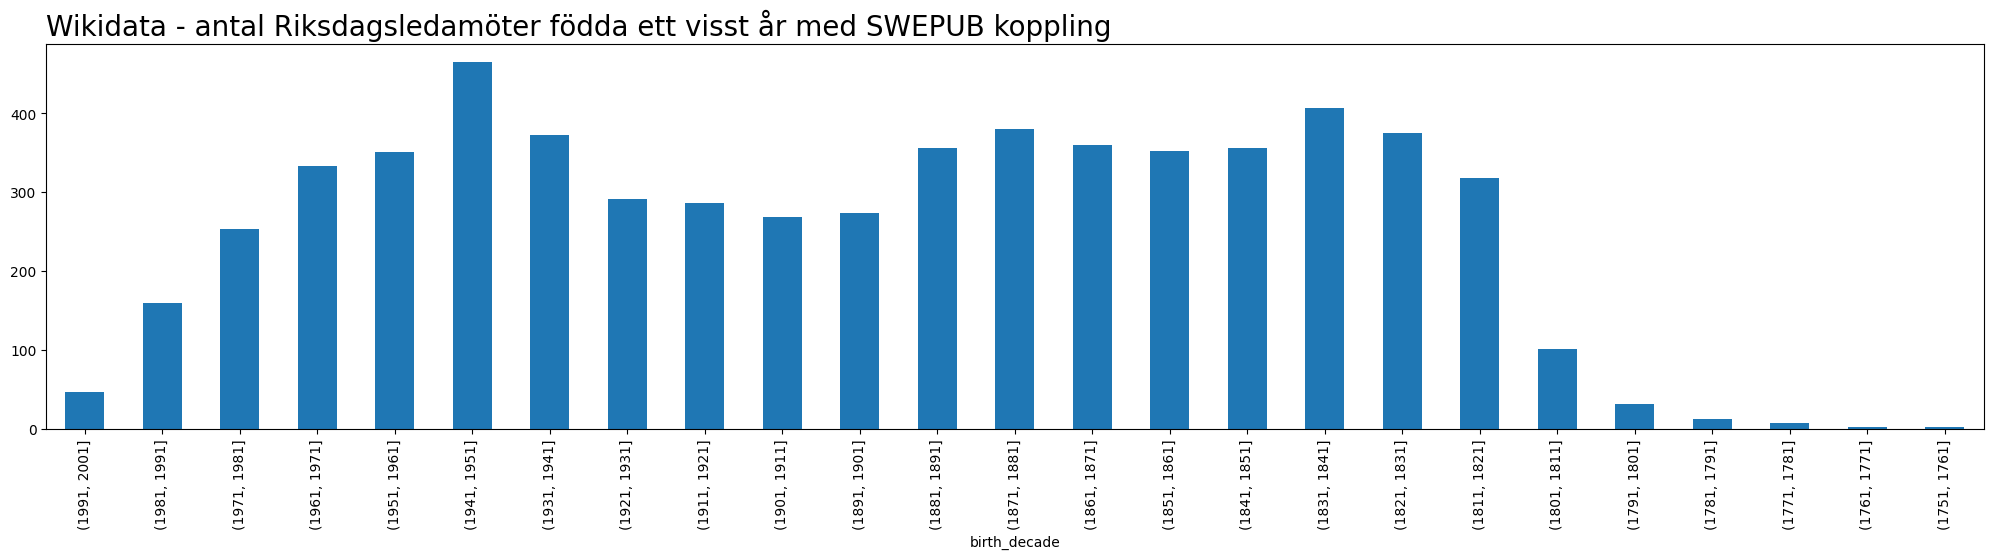

In [54]:
bins = range(int(WDP12192['birth_year'].min()), int(WDP12192['birth_year'].max()) + 10, 10)  
WDP12192['birth_decade'] = pd.cut(WDP12192['birth_year'], bins)
plot = WDP12192.birth_decade.value_counts().sort_index(ascending=False).plot.bar(y='counts', figsize=(25, 5))  
plt.title("Wikidata - antal Riksdagsledamöter födda ett visst år med SWEPUB koppling",fontsize=20,
    loc='left')

plt.show()

In [55]:
WDP12192.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   WikidataID    6175 non-null   object             
 1   Sweriks       6175 non-null   object             
 2   birth         6166 non-null   datetime64[ns, UTC]
 3   Source        6175 non-null   object             
 4   birth_year    6166 non-null   float64            
 5   birth_decade  6165 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), float64(1), object(3)
memory usage: 248.3+ KB


#### Plotta för varje år

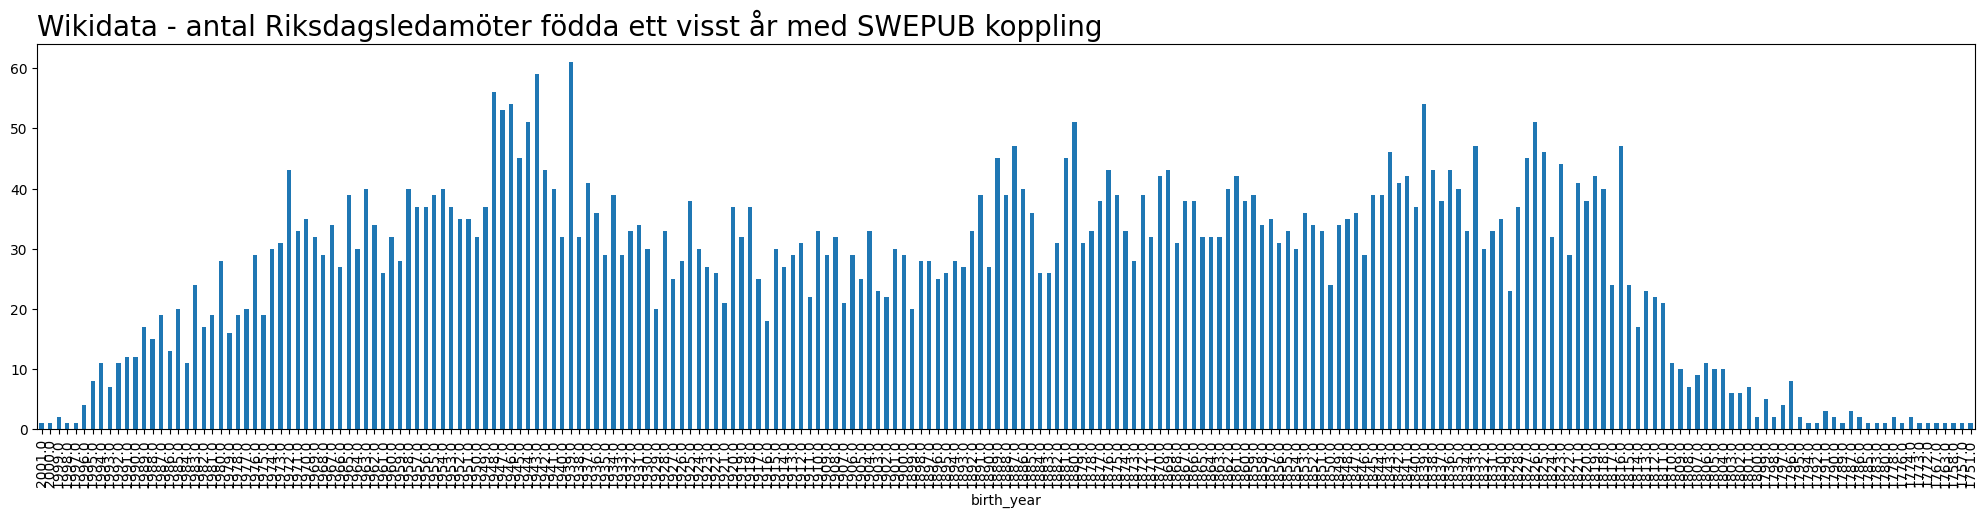

In [56]:
plot = WDP12192.birth_year.value_counts().sort_index(ascending=False).plot.bar(y='counts', figsize=(25, 5))  
plt.title("Wikidata - antal Riksdagsledamöter födda ett visst år med SWEPUB koppling",fontsize=20,
    loc='left')

plt.show()

### Compare Riksdagens Öppna data Wikidata

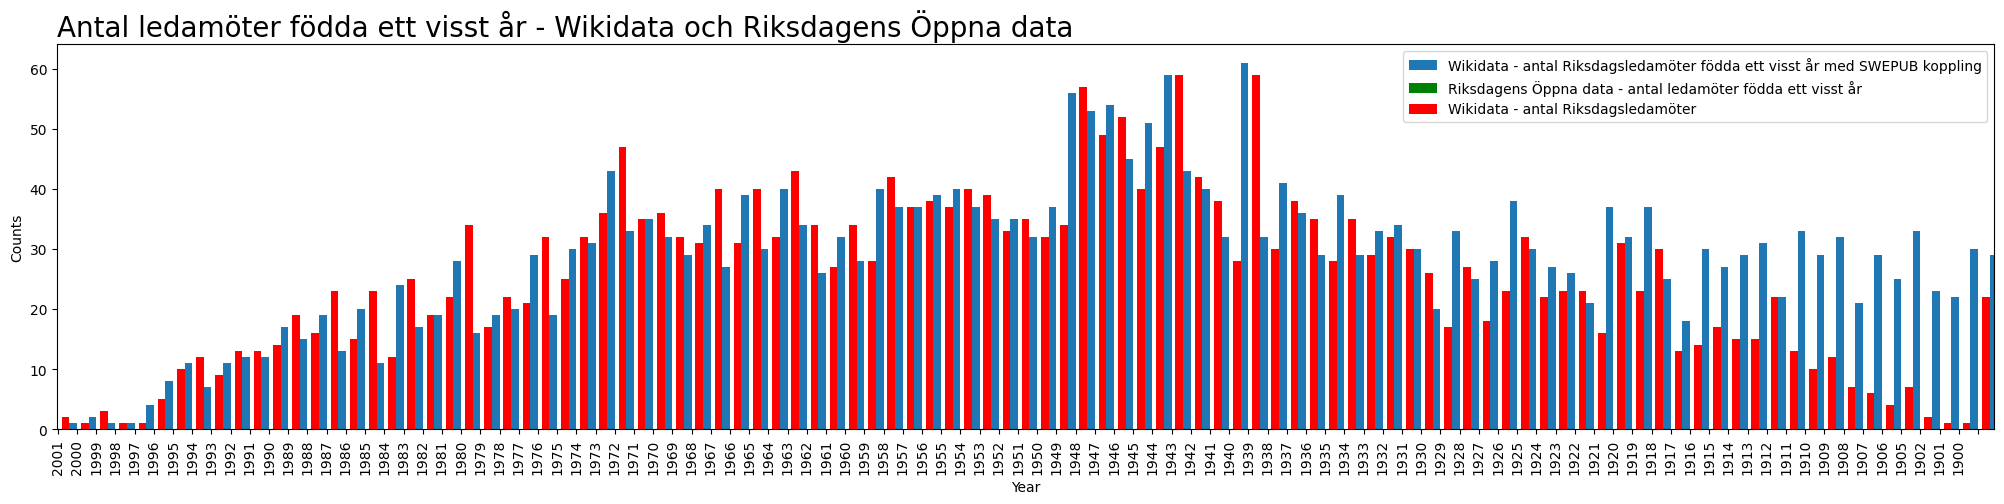

In [57]:
wdp_counts = WDP12192.birth_year.value_counts().sort_index(ascending=False)
df_counts = df.fodd_ar.value_counts().sort_index(ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(25, 5))

# Plot the first dataset
wdp_counts.plot.bar(ax=ax, width=0.4, align='center', position=1, label='Wikidata - antal Riksdagsledamöter födda ett visst år med SWEPUB koppling')

# Plot the second dataset
df_counts.plot.bar(ax=ax, color='green', width=0.4, align='edge', position=0, label='Riksdagens Öppna data - antal ledamöter födda ett visst år')
# Plot the third dataset
df_counts.plot.bar(ax=ax, color='red', width=0.4, align='edge', position=0, label='Wikidata - antal Riksdagsledamöter')

# Add title and labels
plt.title("Antal ledamöter födda ett visst år - Wikidata och Riksdagens Öppna data", fontsize=20, loc='left')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.legend()


# Show the plot
plt.show()


In [58]:
querymissSWEPUBP8388 = """SELECT (REPLACE(STR(?item), ".*Q", "Q") AS ?WikidataID)  ?riksdagenGUID ?SWEPUB ?birth WHERE {
?item wdt:P8388 ?riksdagenGUID
minus {?item wdt:P12192 ?SWEPUB}
OPTIONAL {?item wdt:P569 ?birth}

}"""
WDmissSWEPUBP8388 = get_sparql_dataframe(endpoint_url, querymissSWEPUBP8388)
WDmissSWEPUBP8388["Source"] = "Miss8388" 
WDmissSWEPUBP8388['birth'] = pd.to_datetime(WDmissSWEPUBP8388['birth'])
WDmissSWEPUBP8388['birth_year'] = WDmissSWEPUBP8388['birth'].dt.year
WDmissSWEPUBP8388.sample(4)

,WikidataID,riksdagenGUID,SWEPUB,birth,Source,birth_year
164,Q124302755,81cd94d8-4541-4aff-8061-849c5add5983,None,1951-08-09 00:00:00+00:00,Miss8388,1951.0
6,Q127691517,7c2ccb57-b54b-4b2c-bcd2-7a89d9c4853a,None,1979-11-22 00:00:00+00:00,Miss8388,1979.0
145,Q74848145,74bd8e27-e76a-4ff5-81e8-ae6fdc2feb2d,None,1975-08-20 00:00:00+00:00,Miss8388,1975.0
86,Q4970787,899cbe09-46ce-4e89-b19c-729d4bb2ee51,None,1965-05-27 00:00:00+00:00,Miss8388,1965.0


In [59]:
WDmissSWEPUBP8388.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   WikidataID     166 non-null    object             
 1   riksdagenGUID  166 non-null    object             
 2   SWEPUB         0 non-null      object             
 3   birth          158 non-null    datetime64[ns, UTC]
 4   Source         166 non-null    object             
 5   birth_year     158 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(4)
memory usage: 7.9+ KB


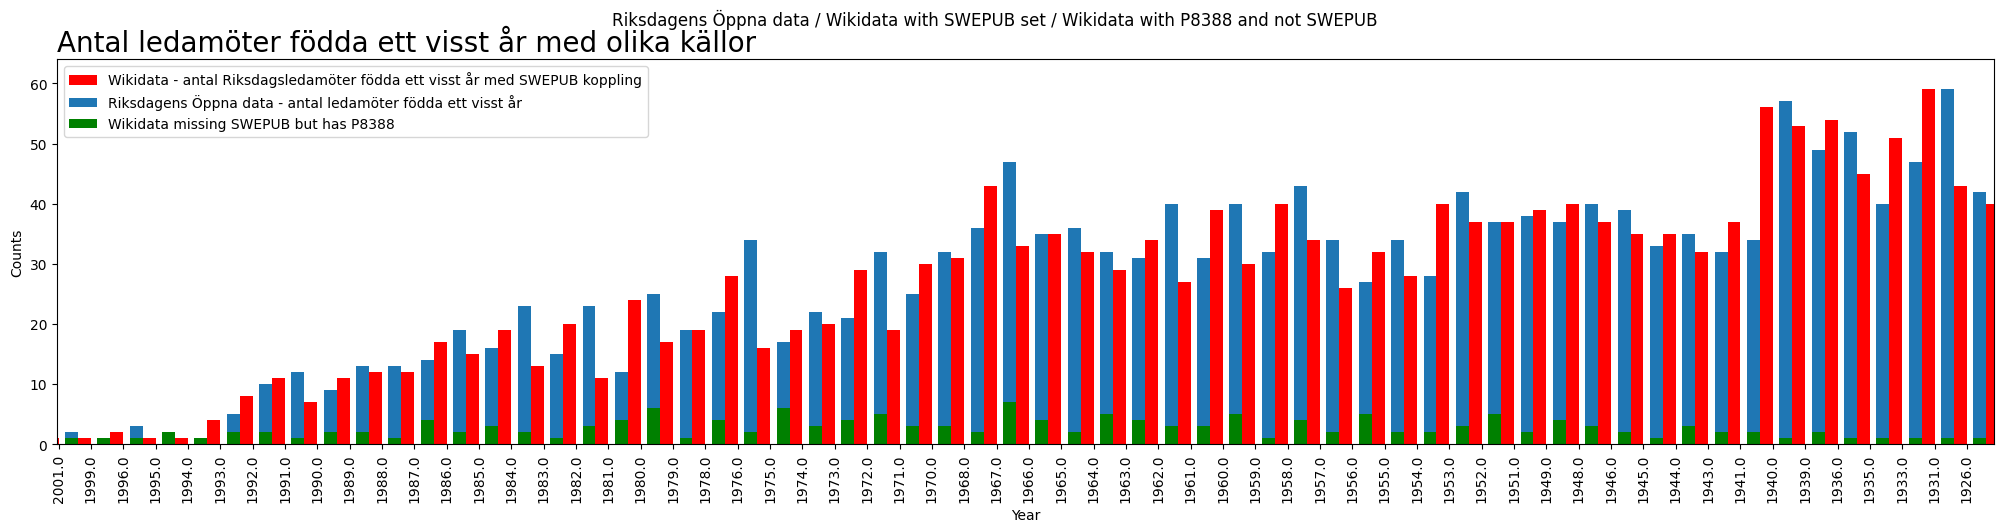

In [60]:

# Data
wdp_counts = WDP12192.birth_year.value_counts().sort_index(ascending=False)
df_counts = df.fodd_ar.value_counts().sort_index(ascending=False)
wdpmiss_counts = WDmissSWEPUBP8388.birth_year.value_counts().sort_index(ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(25, 5))

# Plot the first dataset in red
wdp_counts.plot.bar(ax=ax, color='red', width=0.4, align='center', position=1, label='Wikidata - antal Riksdagsledamöter födda ett visst år med SWEPUB koppling')

# Plot the second dataset with the default color
df_counts.plot.bar(ax=ax, width=0.4, align='edge', position=0, label='Riksdagens Öppna data - antal ledamöter födda ett visst år')

# Plot the third dataset with the default green
wdpmiss_counts.plot.bar(ax=ax, color='green',width=0.4, align='edge', position=0, label='Wikidata missing SWEPUB but has P8388')
 

# Add title and labels
plt.title("Antal ledamöter födda ett visst år med olika källor", fontsize=20, loc='left')
plt.suptitle("Riksdagens Öppna data / Wikidata with SWEPUB set / Wikidata with P8388 and not SWEPUB", fontsize=12)

plt.xlabel('Year')
plt.ylabel('Counts')
plt.legend()

# Show the plot
plt.show()



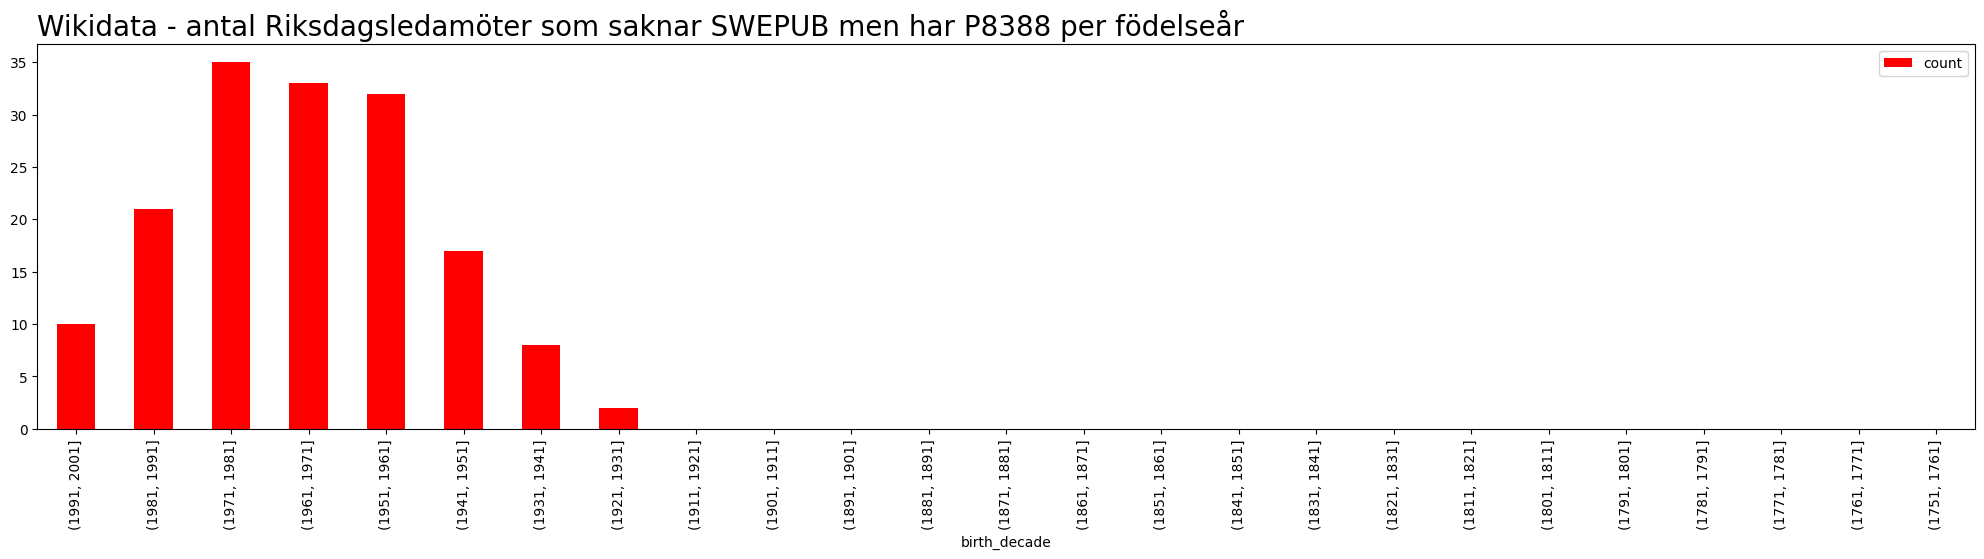

In [61]:
bins2 = range(int(WDmissSWEPUBP8388['birth_year'].min()), int(WDmissSWEPUBP8388['birth_year'].max()) + 10, 10)  
WDmissSWEPUBP8388['birth_decade'] = pd.cut(WDmissSWEPUBP8388['birth_year'], bins)
#plot = WDP12192.birth_decade.value_counts().sort_index(ascending=False).plot.bar(y='counts', figsize=(25, 5))  
plot = WDmissSWEPUBP8388.birth_decade.value_counts().sort_index(ascending=False).plot.bar(color='red',y='counts', figsize=(25, 5))  
# Show the plot

plt.title("Wikidata - antal Riksdagsledamöter som saknar SWEPUB men har P8388 per födelseår",fontsize=20,
    loc='left')
plt.legend()

plt.show()

In [62]:
querymissP8388HasSWEPUB = """SELECT (REPLACE(STR(?item), ".*Q", "Q") AS ?WikidataID)  ?riksdagenGUID ?SWEPUB ?birth WHERE {
?item wdt:P12192 ?SWEPUB
minus{?item wdt:P8388 ?riksdagenGUID}
OPTIONAL {?item wdt:P569 ?birth}

}"""
WDmissP8388SWEPUB = get_sparql_dataframe(endpoint_url, querymissP8388HasSWEPUB)
WDmissP8388SWEPUB["Source"] = "Miss8388" 
WDmissP8388SWEPUB['birth'] = pd.to_datetime(WDmissP8388SWEPUB['birth'])
WDmissP8388SWEPUB['birth_year'] = WDmissP8388SWEPUB['birth'].dt.year
WDmissP8388SWEPUB.sample(4)

,WikidataID,riksdagenGUID,SWEPUB,birth,Source,birth_year
2868,Q6193087,None,i-2gFz918CyUZkTuGwyS9VJt,1836-10-03 00:00:00+00:00,Miss8388,1836.0
96,Q5547336,None,i-B8NxNnu1t7iC4QAwR3ccxG,1861-05-13 00:00:00+00:00,Miss8388,1861.0
1834,Q5896011,None,i-9hGKtwhDVvJSEkq4CXz1ii,1834-05-25 00:00:00+00:00,Miss8388,1834.0
174,Q5561113,None,i-A6HKJELS9dEVb676FNQ5tp,1812-06-18 00:00:00+00:00,Miss8388,1812.0


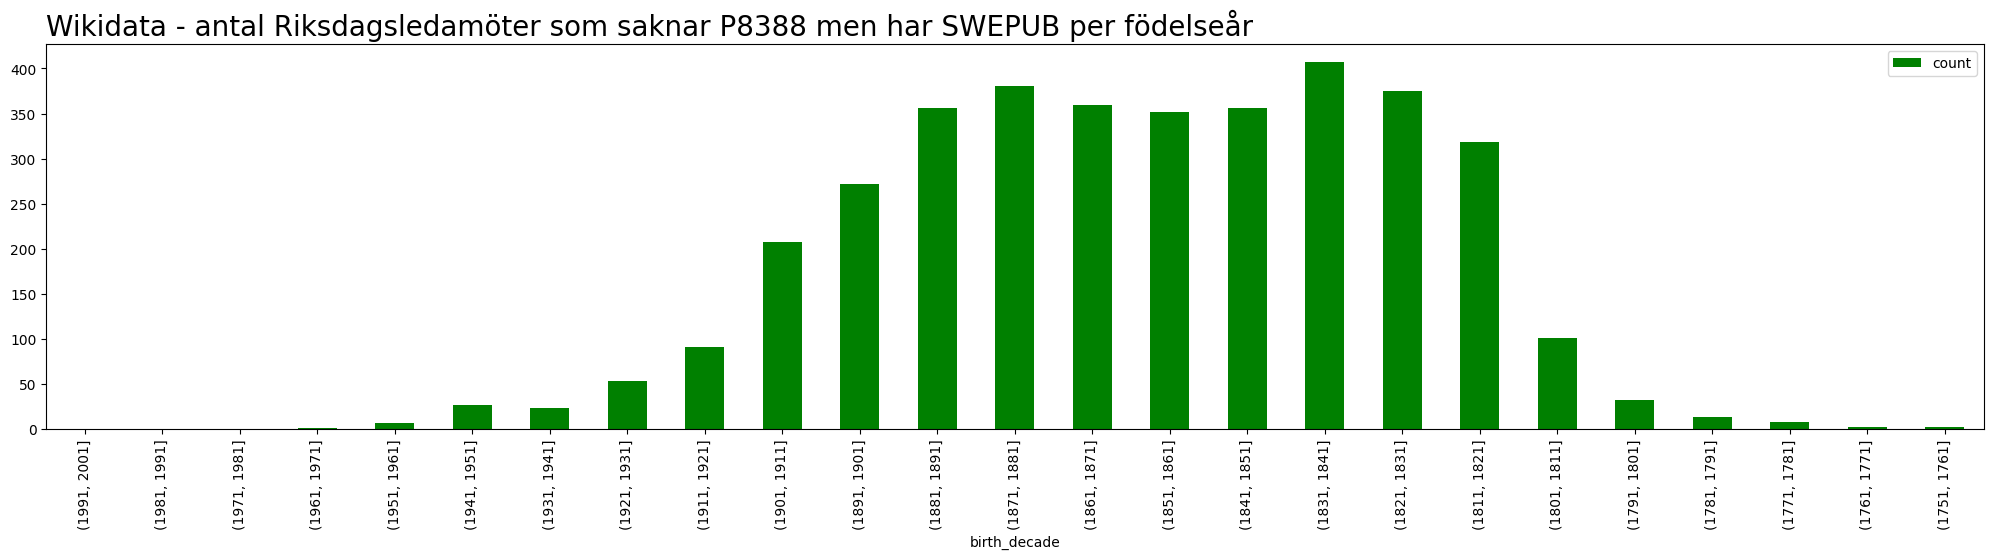

In [63]:
bins3 = range(int(WDmissP8388SWEPUB['birth_year'].min()), int(WDmissP8388SWEPUB['birth_year'].max()) + 10, 10)  
WDmissP8388SWEPUB['birth_decade'] = pd.cut(WDmissP8388SWEPUB['birth_year'], bins)
#plot = WDP12192.birth_decade.value_counts().sort_index(ascending=False).plot.bar(y='counts', figsize=(25, 5))  
#plot3 = WDmissSWEPUBP8388.birth_decade.value_counts().sort_index(ascending=False).plot.bar(y='counts', figsize=(25, 5))  
plot3 = WDmissP8388SWEPUB.birth_decade.value_counts().sort_index(ascending=False).plot.bar(color='green',y='counts', figsize=(25, 5))  
# Show the plot

plt.title("Wikidata - antal Riksdagsledamöter som saknar P8388 men har SWEPUB per födelseår",fontsize=20,
    loc='left')
plt.legend()

plt.show()

## Pie chart

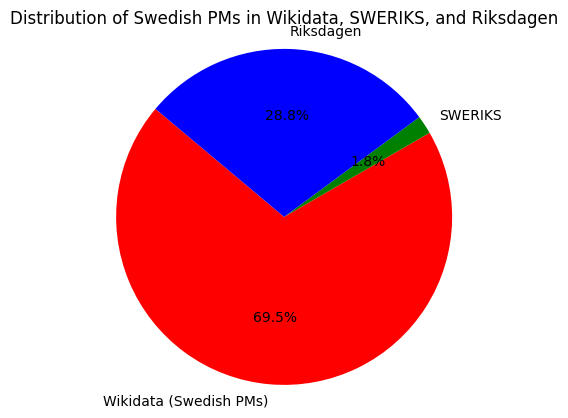

In [64]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Wikidata (Swedish PMs)', 'SWERIKS', 'Riksdagen']
sizes = [wdp_counts.sum(), wdpmiss_counts.sum(), df_counts.sum()]
colors = ['red', 'green', 'blue']

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title("Distribution of Swedish PMs in Wikidata, SWERIKS, and Riksdagen")

# Equal aspect ratio ensures the pie is drawn as a circle
ax.axis('equal')

# Show the plot
plt.show()


In [65]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2025-03-06 15:23:29.589133
Time elapsed (hh:mm:ss.ms) 0:00:18.666874
